In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Import All dependencies**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



# **Load and display Video**

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/jugling.mov')

while True:
    ret, frame = cap.read() #capture frame
    if ret==True:
        frame = cv2.resize(frame, (640, 360)) #set frame dimension
        
        if (cv2.waitKey(1) & 0xff == 27): # Stop if escape key pressed
          break
    else:
        break
#Release everything
cap.release() 
cv2.destroyAllWindows() 

# **Calculate Color values for each ball**

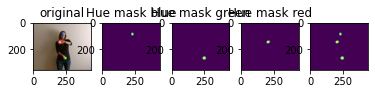

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/jugling.mov')
ret, frame = cap.read()

frame = cv2.resize(frame, (640, 360)) 
rows,cols,ret = frame.shape
frame = frame[:,100:cols-100]
original = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(frame ,(0,0),5)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV) # Convert Image to HSV domain to detect colors more accurately


############### Calculated ranges of HSV values for all three balls #################
lowerblue = np.array([100,68,120])
upperblue = np.array([140,255,255])

lowergreen = np.array([29,73,75])
uppergreen = np.array([70,255,255]) 

lowerred = np.array([0,100,180])
upperred = np.array([6,255,255]) 

############# Balls Segmentation based on colors #################
maskblue = cv2.inRange(hsv, lowerblue, upperblue)  
maskgreen = cv2.inRange(hsv, lowergreen, uppergreen)  
maskred = cv2.inRange(hsv, lowerred, upperred)  
mask = maskblue + maskgreen + maskred

#Apply morphological operations to remove small particles
erosion = cv2.erode(mask,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)
dilation = cv2.dilate(erosion,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 1)

#Display Images
plt.subplot(1,5,1)
plt.imshow(original)
plt.title('original')

plt.subplot(1,5,2)
plt.imshow(maskblue)
plt.title('Hue mask blue')

plt.subplot(1,5,3)
plt.imshow(maskgreen)
plt.title('Hue mask green')

plt.subplot(1,5,4)
plt.imshow(maskred)
plt.title('Hue mask red')

plt.subplot(1,5,5)
plt.imshow(dilation)


# **Draw Circles**

In [ ]:

cap = cv2.VideoCapture('/content/drive/MyDrive/jugling.mov')
ret, frame = cap.read()
ret, frame = cap.read() # Take two frames in order to avoid program crash

rows,cols,ret = frame.shape
frame = frame[:,100:cols-100]
hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)


maskblue = cv2.inRange(hsv, lowerblue, upperblue)  # Segment Blue Ball
#Apply morphological operations
maskblue = cv2.erode(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
maskblue = cv2.dilate(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
maskblue = cv2.erode(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 2)

x1,y1,w1,h1 = cv2.boundingRect(maskblue) #Find the region of blue ball

#Find the center of blue ball
center1_x = x1+int(w1/2)
center1_y = y1+int(h1/2)

# Repeat the same as above for the rest of two balls
maskgreen = cv2.inRange(hsv, lowergreen, uppergreen) 
maskgreen = cv2.erode(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
maskgreen = cv2.dilate(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
maskgreen = cv2.erode(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 2)
x2,y2,w2,h2 = cv2.boundingRect(maskgreen)
center2_x = x2+int(w2/2)
center2_y = y2+int(h2/2)

maskred = cv2.inRange(hsv, lowerred, upperred)  
maskred = cv2.erode(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
maskred = cv2.dilate(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
maskred = cv2.erode(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 2)
x3,y3,w3,h3 = cv2.boundingRect(maskred)
center3_x = x3+int(w3/2)
center3_y = y3+int(h3/2)

#Draw circles around each ball
cv2.circle(frame,(center1_x,center1_y),10,(255,255,255),2) #original?
cv2.circle(frame,(center2_x,center2_y),10,(255,255,255),2) #original?
cv2.circle(frame,(center3_x,center3_y),10,(255,255,255),2) #original?

#Combine all balls in one frame
mask = maskblue + maskgreen + maskred


plt.figure(figsize=(12,12)) #Set the dimension of figure to display
       
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
 

NameError: ignored

# **Tracking of balls and Finding their speed**

Tracking Completed


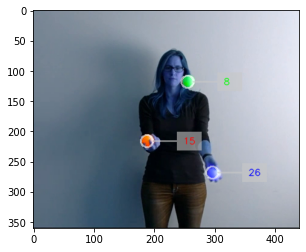

In [ ]:

#Calculated HSV ranges for all three balls
lowerblue = np.array([100,68,120])
upperblue = np.array([140,255,255])

lowergreen = np.array([29,73,75])
uppergreen = np.array([70,255,255])  

lowerred = np.array([0,100,180])
upperred = np.array([6,255,255])   


cap = cv2.VideoCapture('/content/drive/MyDrive/jugling.mov') #Load video <Put the path to the video>
ret, frame = cap.read()

rows,cols,ret = frame.shape #Get the rows and columns of frame 
temp = frame

out = cv2.VideoWriter('/content/drive/MyDrive/tracking.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (cols-200,rows)) #Create object to save video
ret, frame = cap.read()

counter = 1
# Initilize parameters for finding velocity of balls
prev_center1_x = 0
prev_center2_x = 0
prev_center3_x = 0
prev_center1_y = 0
prev_center2_y = 0
prev_center3_y = 0
speed_1 = 0
speed_2 = 0
speed_3 = 0

# Decalre arrays to store points for plotting
speed1 = []
speed2 = []
speed3 = []
time_counter = 1
time = []

while ret == True:
    frame = frame[:,100:cols-100]
    
    if ret==True:
        original = frame.copy()
        blur = cv2.GaussianBlur(frame ,(0,0),5) #Blur the image to remove noise
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

        maskblue = cv2.inRange(hsv, lowerblue, upperblue) #Detect Blue colored ball

        #Apply morphological operations to remove small remaining particles 
        maskblue = cv2.erode(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskblue = cv2.dilate(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x1,y1,w1,h1 = cv2.boundingRect(maskblue)
        #Find center
        center1_x = x1+int(w1/2)
        center1_y = y1+int(h1/2)

        maskgreen = cv2.inRange(hsv, lowergreen, uppergreen) 
        maskgreen = cv2.erode(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskgreen = cv2.dilate(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x2,y2,w2,h2 = cv2.boundingRect(maskgreen)
        center2_x = x2+int(w2/2)
        center2_y = y2+int(h2/2)
        

        maskred = cv2.inRange(hsv, lowerred, upperred)  
        maskred = cv2.erode(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskred = cv2.dilate(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x3,y3,w3,h3 = cv2.boundingRect(maskred)
        center3_x = x3+int(w3/2)
        center3_y = y3+int(h3/2)

        #Draw Circles around each ball
        cv2.circle(frame,(center1_x,center1_y),10,(255,255,255),2)
        cv2.circle(frame,(center2_x,center2_y),10,(255,255,255),2)
        cv2.circle(frame,(center3_x,center3_y),10,(255,255,255),2)

        mask = maskblue + maskgreen + maskred
        
        if counter == 5:  #Measure speed of each ball on every third frame

          #Find distance based on difference of pixels
          dist_1 = np.sqrt(np.square(center1_x-prev_center1_x)+np.square(center1_y-prev_center1_y))
          dist_2 = np.sqrt(np.square(center2_x-prev_center2_x)+np.square(center2_y-prev_center2_y))
          dist_3 = np.sqrt(np.square(center3_x-prev_center3_x)+np.square(center3_y-prev_center3_y))

          #Velocity = dist/time (Here pixels/frame)
          speed_1 = int(dist_1)
          speed_2 = int(dist_2)
          speed_3 = int(dist_3)

          #Keep record of current centers for later processing
          prev_center1_x = center1_x
          prev_center2_x = center2_x
          prev_center3_x = center3_x
          prev_center1_y = center1_y
          prev_center2_y = center2_y
          prev_center3_y = center3_y
          counter = 1
        if speed_1 < 50 and speed_2 < 50 and speed_3 < 50:
          speed1.append(speed_1)
          speed2.append(speed_2)
          speed3.append(speed_3)
          time.append(time_counter)

        cv2.line(frame,(center1_x+10,center1_y),(center1_x+50,center1_y),(200,200,200),2,)
        cv2.line(frame,(center2_x+10,center2_y),(center2_x+50,center2_y),(200,200,200),2,)
        cv2.line(frame,(center3_x+10,center3_y),(center3_x+50,center3_y),(200,200,200),2,)
        cv2.rectangle(frame,(center1_x+50,center1_y-15),(center1_x+50+40,center1_y+15),(200,200,200),-1)
        cv2.rectangle(frame,(center2_x+50,center2_y-15),(center2_x+50+40,center2_y+15),(200,200,200),-1)
        cv2.rectangle(frame,(center3_x+50,center3_y-15),(center3_x+50+40,center3_y+15),(200,200,200),-1)
        alpha = 0.6  # Transparency factor.
        # Following line overlays transparent rectangle over the image
        frame = cv2.addWeighted(frame, alpha, original, 1-alpha, 0)
        
        cv2.putText(frame,str(speed_1),(center1_x+60,center1_y+5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1,cv2.LINE_AA)
        cv2.putText(frame,str(speed_2),(center2_x+60,center2_y+5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
        cv2.putText(frame,str(speed_3),(center3_x+60,center3_y+5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

        #Write each frame to video
        out.write(frame)
        temp = frame
        
        if (cv2.waitKey(1) & 0xff == 27): #Video will stop upon pressing escape 
          break
    else:
        break
    counter = counter+1
    time_counter = time_counter+1
    ret, frame = cap.read()

plt.imshow(temp) # Display final frame
print('Tracking Completed')

#release both objects
cap.release() 
out.release()

#cv2.destroyAllWindows() # delete output window
#cv2.waitKey(1);





# **Find Trajectory**

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('/content/drive/MyDrive/jugling.mov') 
ret, frame = cap.read()

cv2_imshow(frame)
counter = 1

#declare the arrays to save the points
trajec_1 = []
trajec_2 = []
trajec_3 = []


while ret == True:
    frame = frame[:,100:cols-100]
    if ret==True:
        original = frame.copy()
        blur = cv2.GaussianBlur(frame ,(0,0),5)
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

        maskblue = cv2.inRange(hsv, lowerblue, upperblue)  
        maskblue = cv2.erode(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskblue = cv2.dilate(maskblue,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x1,y1,w1,h1 = cv2.boundingRect(maskblue)
        center1_x = x1+int(w1/2)
        center1_y = y1+int(h1/2)

        maskgreen = cv2.inRange(hsv, lowergreen, uppergreen) 
        maskgreen = cv2.erode(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskgreen = cv2.dilate(maskgreen,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x2,y2,w2,h2 = cv2.boundingRect(maskgreen)
        center2_x = x2+int(w2/2)
        center2_y = y2+int(h2/2)
        

        maskred = cv2.inRange(hsv, lowerred, upperred)  
        maskred = cv2.erode(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
        maskred = cv2.dilate(maskred,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations = 2)
        x3,y3,w3,h3 = cv2.boundingRect(maskred)
        center3_x = x3+int(w3/2)
        center3_y = y3+int(h3/2)

        mask = maskblue + maskgreen + maskred
        
        if counter == 10:
          trajec_1.append((center1_x,center1_y))
          trajec_2.append((center2_x,center2_y))
          trajec_3.append((center3_x,center3_y))
          counter = 1
        
    counter = counter+1
    ret, frame = cap.read() # read next frame

# Create a clone to display trajectory of each ball seperately
frame_red = original.copy()
frame_green = original.copy()
frame_blue = original.copy()


# Draw the trajectories
for j in range(int(np.size(trajec_1)/3)):
  cv2.line(frame_blue,trajec_1[j],trajec_1[j+1],(150,0,0),2)

for j in range(int(np.size(trajec_2)/3)):
  cv2.line(frame_green,trajec_2[j],trajec_2[j+1],(0,150,0),2)

for j in range(int(np.size(trajec_3)/3)):
  cv2.line(frame_red,trajec_3[j],trajec_3[j+1],(0,0,150),2)

#Display trajectory of each ball seperately
cv2_imshow(frame_blue1)
cv2_imshow(frame_green1)
cv2_imshow(frame_red1)

print('Done')
cap.release() # release input video



# **Draw Trajectories**

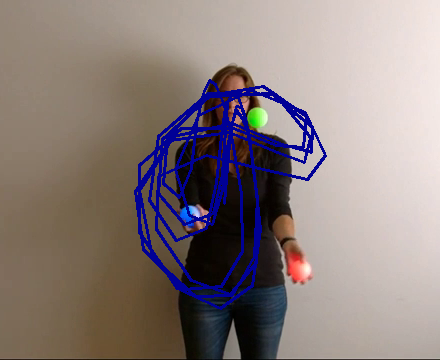

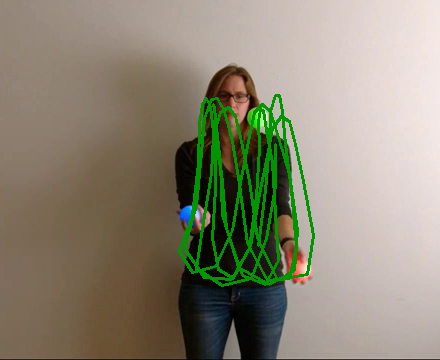

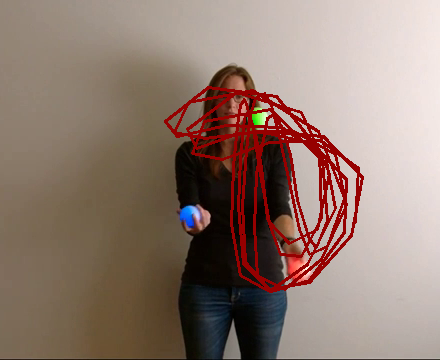

In [59]:
cv2_imshow(frame_blue)
cv2_imshow(frame_green)
cv2_imshow(frame_red)

## **Apply effects on Trajectories**

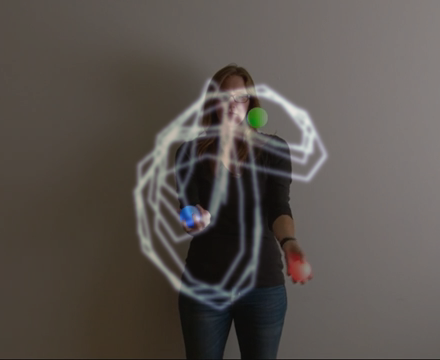

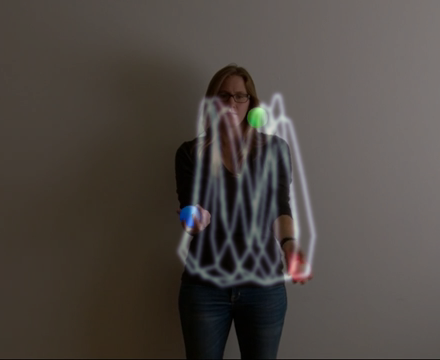

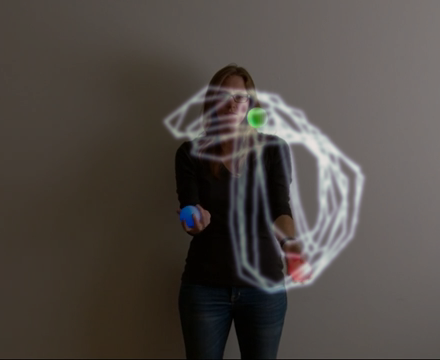

In [58]:
rows,cols,ret = frame_red.shape

frame_red1 = original.copy()
frame_green1 = original.copy()
frame_blue1 = original.copy()

frame_red1[0:rows,0:cols] = 0
frame_green1[0:rows,0:cols] = 0
frame_blue1[0:rows,0:cols] = 0



# Draw the trajectories
for j in range(int(np.size(trajec_1)/3)):
  cv2.line(frame_blue1,trajec_1[j],trajec_1[j+1],(255,255,255),2)

for j in range(int(np.size(trajec_2)/3)):
  cv2.line(frame_green1,trajec_2[j],trajec_2[j+1],(255,255,255),2)

for j in range(int(np.size(trajec_3)/3)):
  cv2.line(frame_red1,trajec_3[j],trajec_3[j+1],(255,255,255),2)

alpha = 0.5  
frame_blue1 = cv2.GaussianBlur(frame_blue1 ,(0,0),2)
frame_blue1 = cv2.applyColorMap(frame_blue1, cv2.COLORMAP_BONE)
frame_blue1 = cv2.addWeighted(frame_blue1, alpha, original, 1-alpha, 0)

frame_green1 = cv2.GaussianBlur(frame_green1 ,(0,0),2)
frame_green1 = cv2.applyColorMap(frame_green1, cv2.COLORMAP_BONE)
frame_green1 = cv2.addWeighted(frame_green1, alpha, original, 1-alpha, 0)

frame_red1 = cv2.GaussianBlur(frame_red1 ,(0,0),2)
frame_red1 = cv2.applyColorMap(frame_red1, cv2.COLORMAP_BONE)
frame_red1 = cv2.addWeighted(frame_red1, alpha, original, 1-alpha, 0)

#Display trajectory of each ball seperately
cv2_imshow(frame_blue1)
cv2_imshow(frame_green1)
cv2_imshow(frame_red1)

## **Plotting Speed of balls w.r.t time**

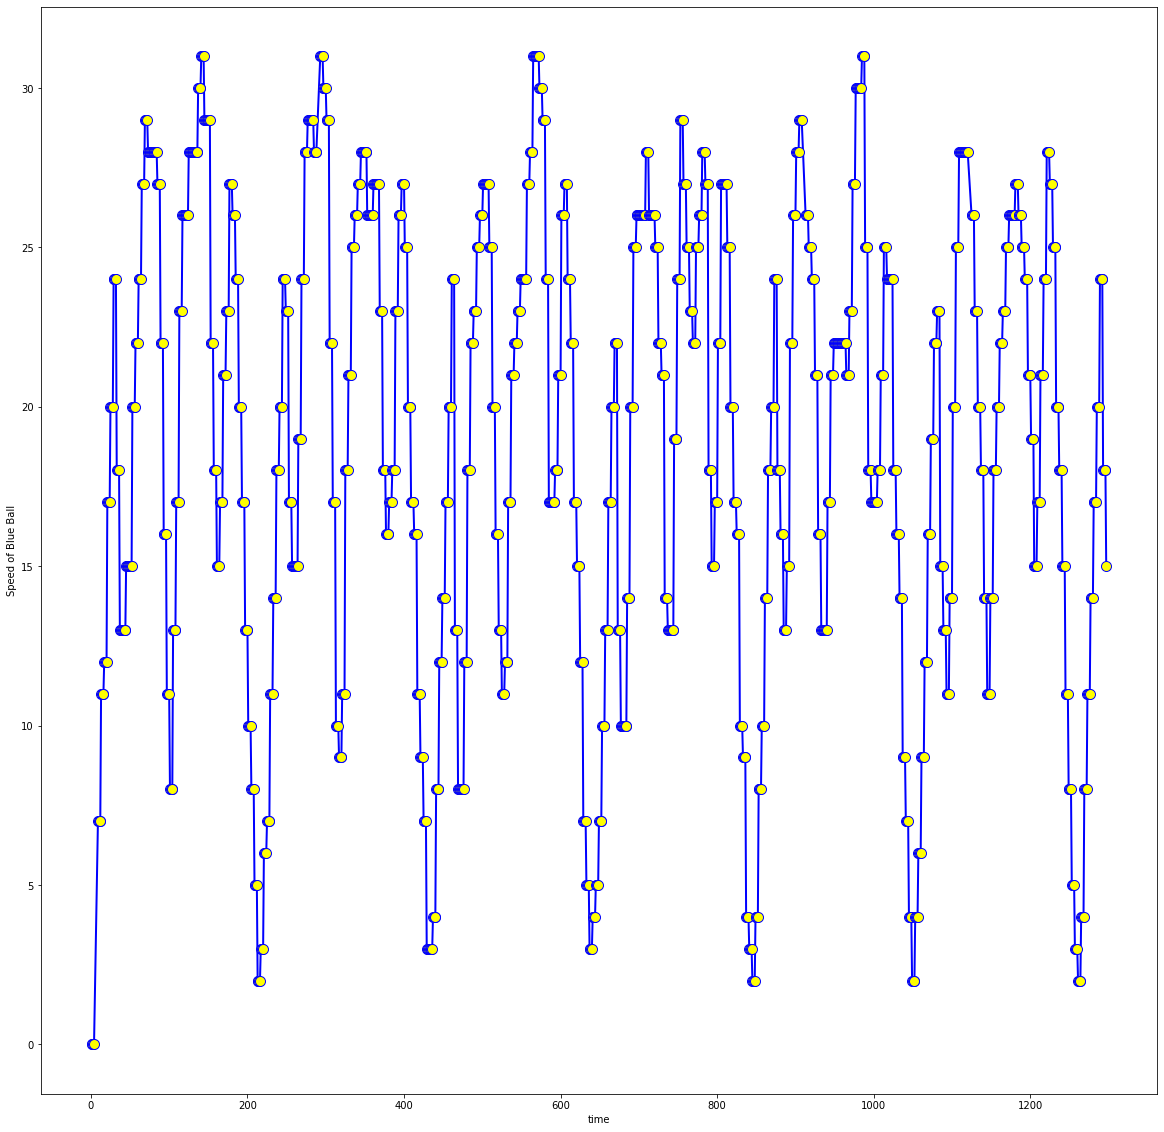

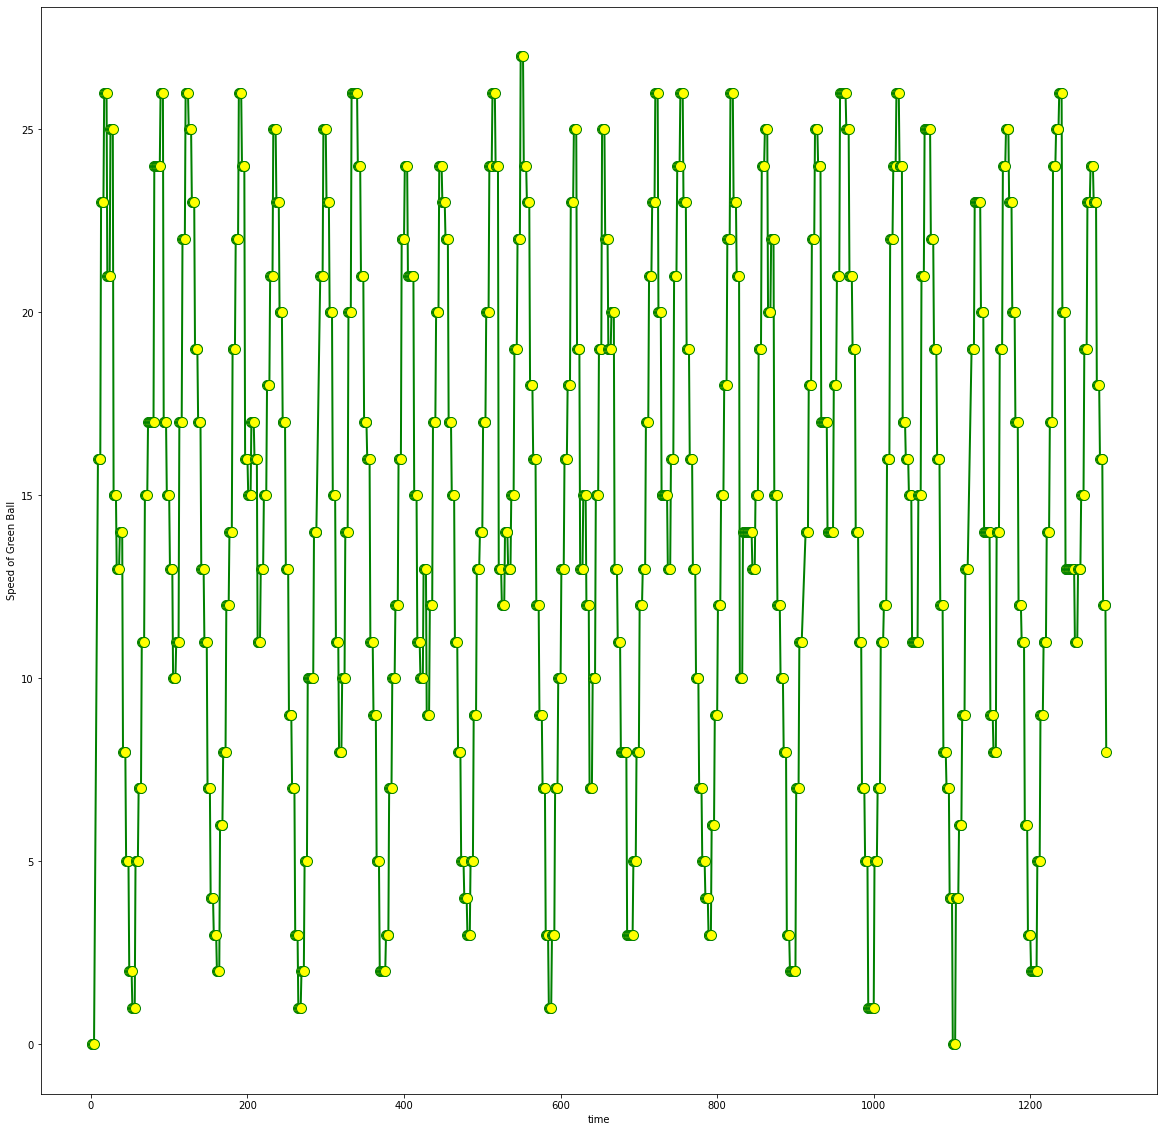

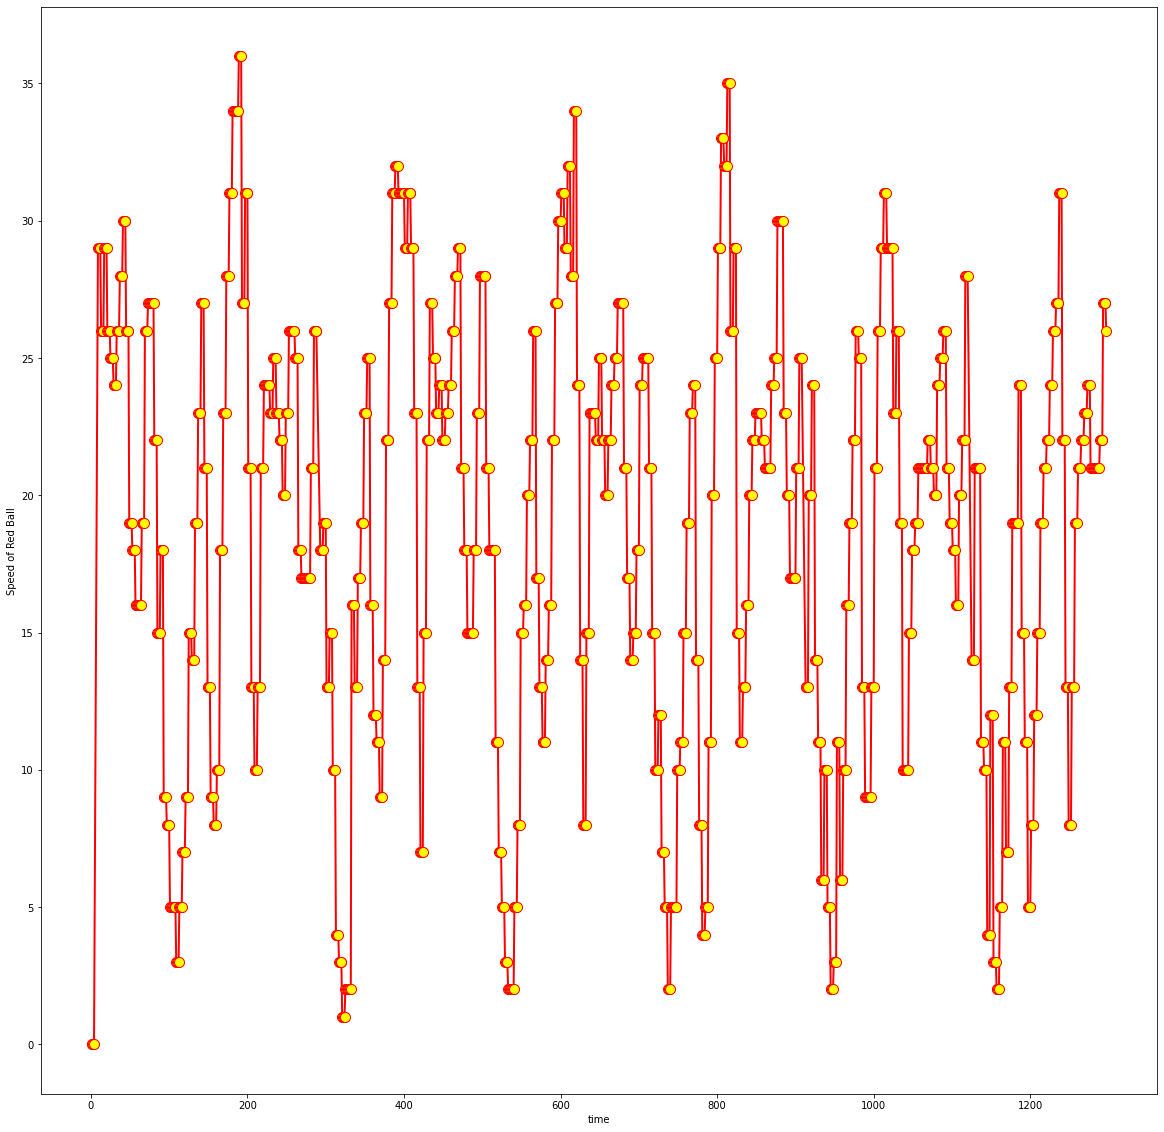

In [ ]:
plt.figure(figsize = (20,20))
plt.plot(time,speed1, color = 'blue', linestyle = 'solid', linewidth = 2, marker = 'o', markerfacecolor = 'yellow', markersize = '10')
plt.xlabel('time')
plt.ylabel('Speed of Blue Ball')
plt.show()
plt.figure(figsize = (20,20))
plt.plot(time,speed2, color = 'green', linestyle = 'solid', linewidth = 2, marker = 'o', markerfacecolor = 'yellow', markersize = '10')
plt.xlabel('time')
plt.ylabel('Speed of Green Ball')
plt.show()
plt.figure(figsize = (20,20))
plt.plot(time,speed3, color = 'red', linestyle = 'solid', linewidth = 2, marker = 'o', markerfacecolor = 'yellow', markersize = '10')
plt.xlabel('time')
plt.ylabel('Speed of Red Ball')
plt.show()